In [1]:
using JSON
using CairoMakie

include("../../Modules/TestingFunctions.jl")
using .TestingFunctions

# Testing number of steps

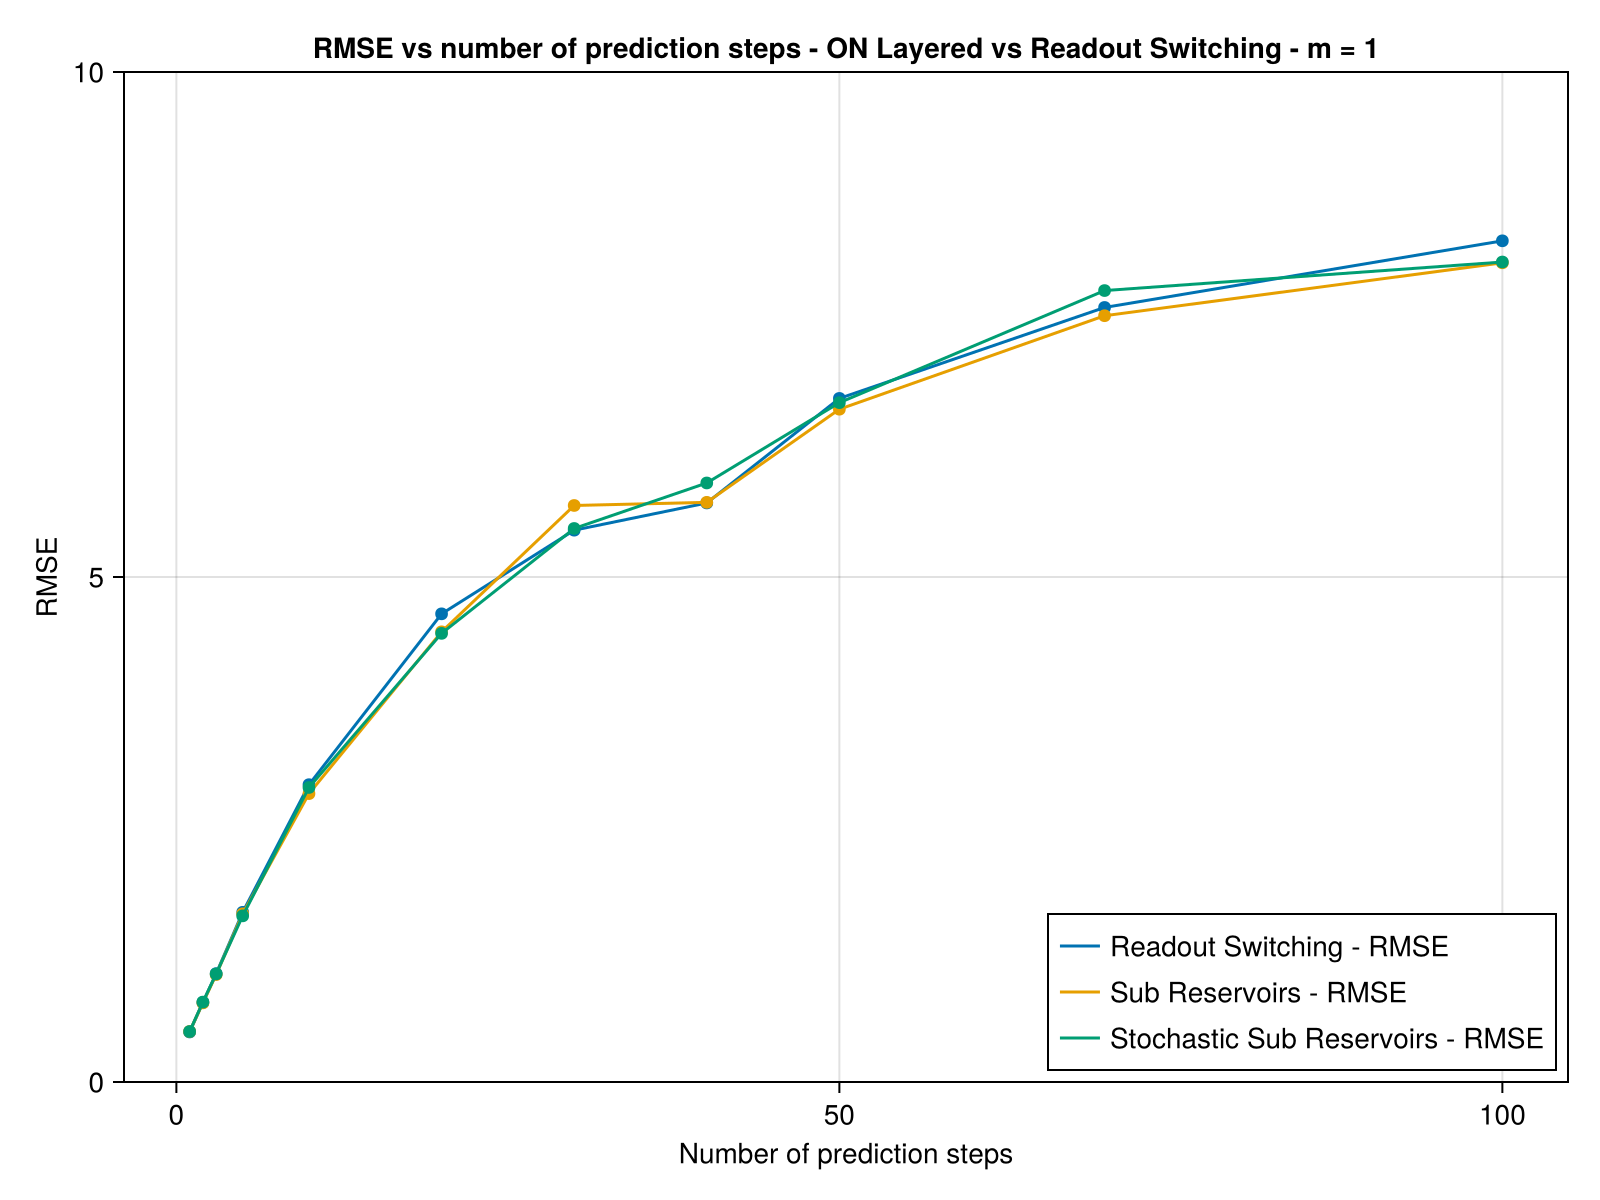

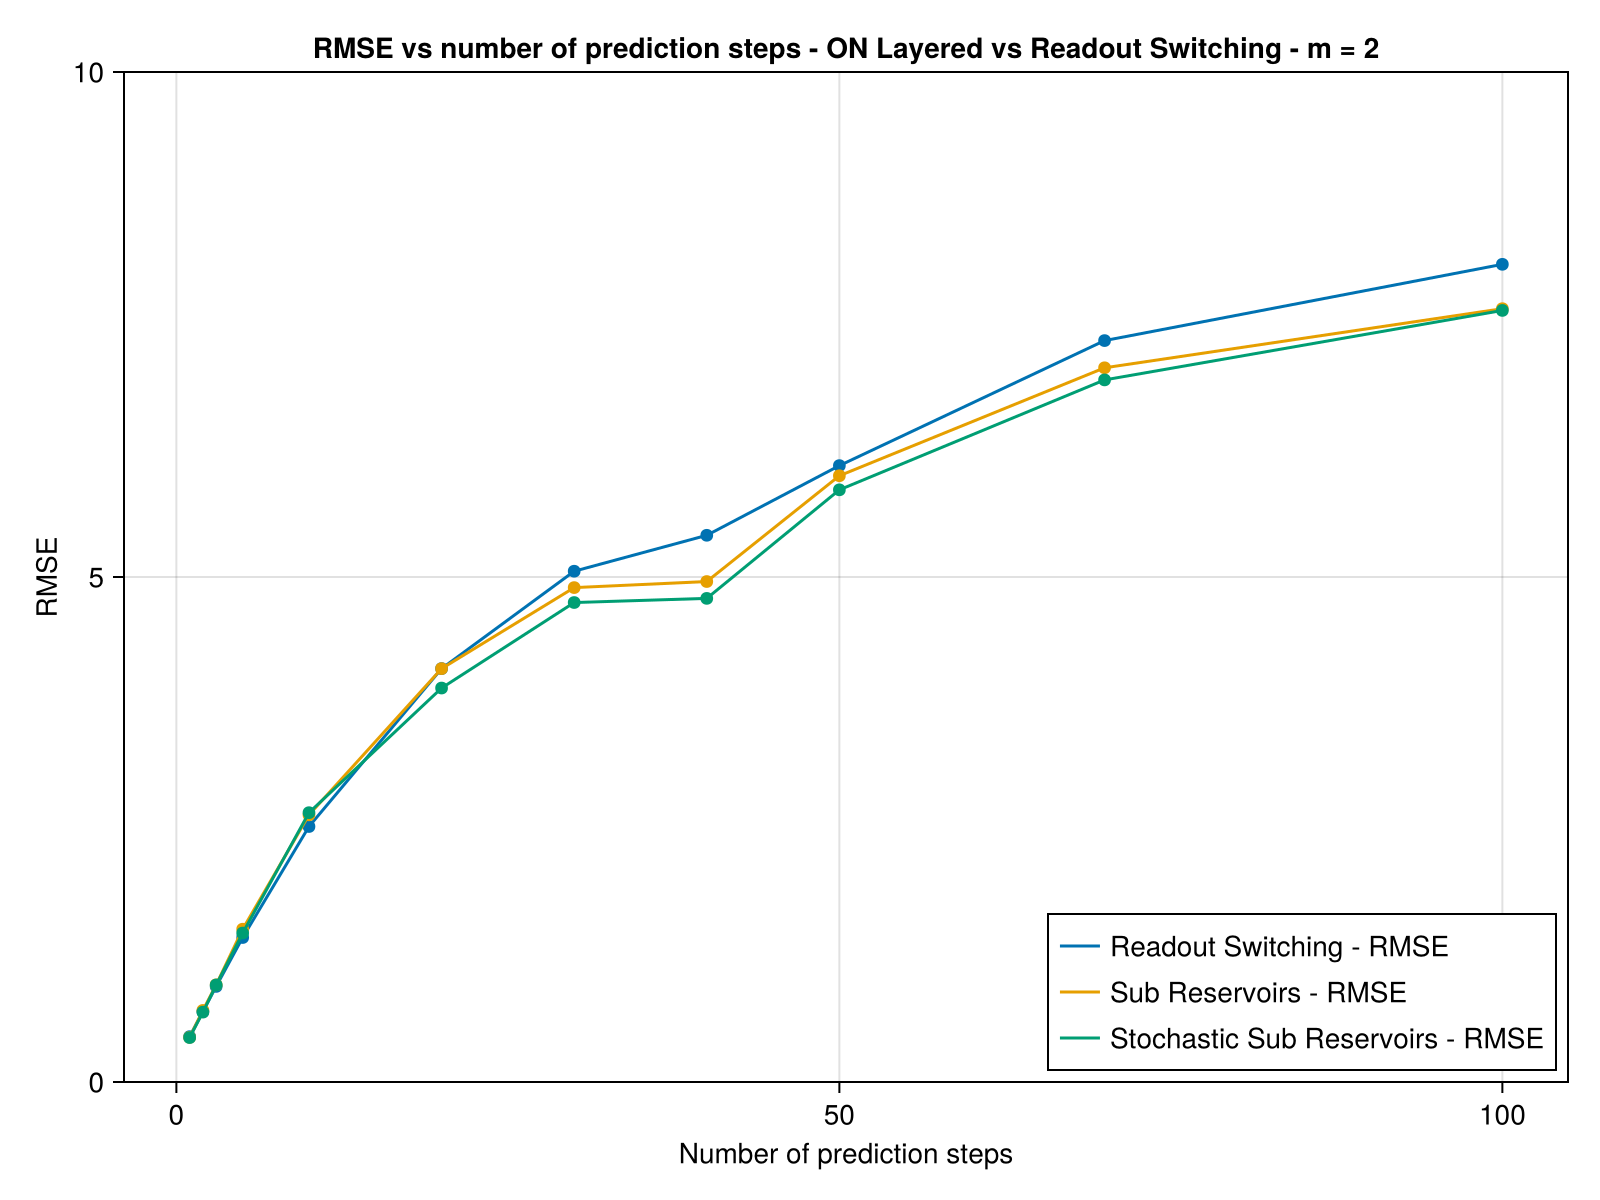

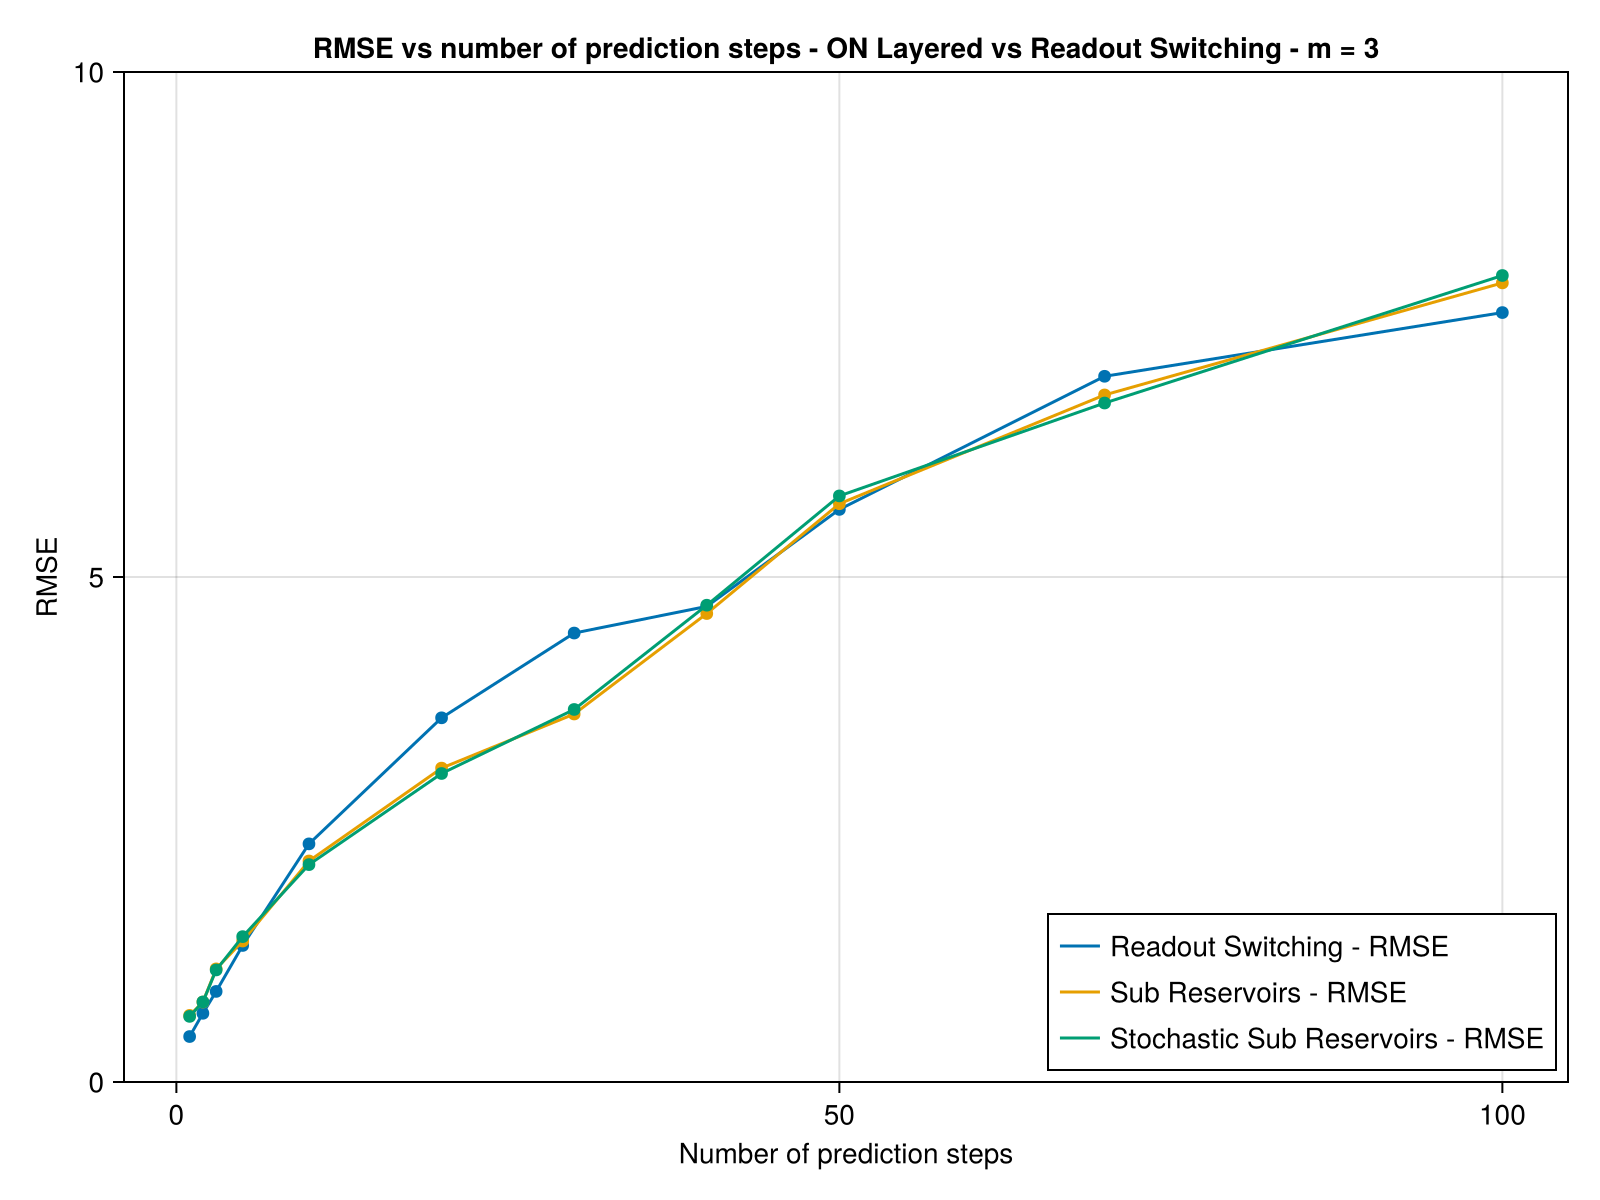

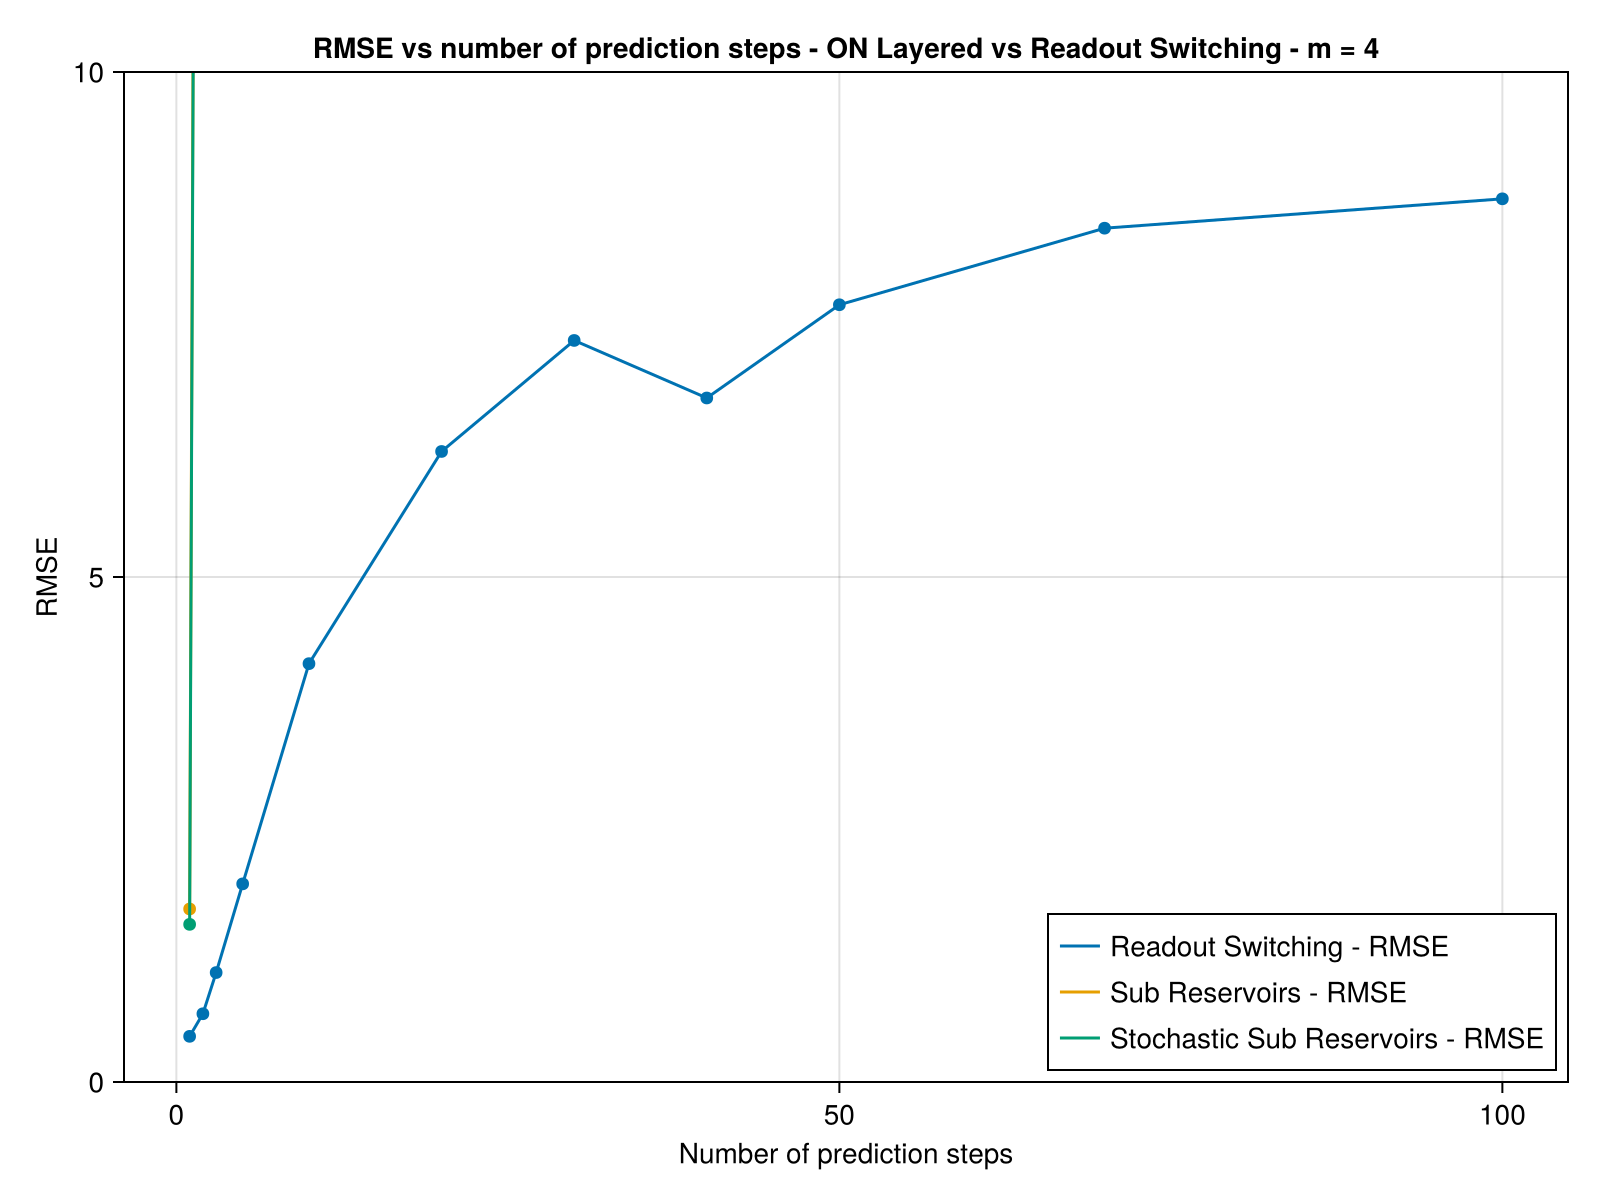

In [2]:
test_search = Dict(
        "prediction_type" => "multi_step",
        "testing_params" => Dict(
            "mask_states_b4_readout" => false,
            "stochastic" => false,
            "stochastic_rescale_V_rec" => false
        ),
        "data" => "Lorenz 0_01",
        "testing_parameter" => "n_steps",
        "ignore_first" => 100,
        "trials" => 30,
        "total_k" => 468
    )

for m in 1:4
    test_search["m"] = m

    test_search["testing_params"]["readout_switching"] = true
    test_search["testing_params"]["stochastic"] = false
    test_search["testing_params"]["stochastic_rescale_V_rec"] = false
    readout_switching_tests = find_test(test_search)

    test_search["testing_params"]["readout_switching"] = false
    test_search["testing_params"]["stochastic"] = false
    test_search["testing_params"]["stochastic_rescale_V_rec"] = false
    ON_layered_tests = find_test(test_search)

    test_search["testing_params"]["readout_switching"] = false
    test_search["testing_params"]["stochastic"] = true
    test_search["testing_params"]["stochastic_rescale_V_rec"] = true
    stochastic_tests = find_test(test_search)

    test_dict = Dict()
    test_dict["Readout Switching"] = readout_switching_tests[1]
    test_dict["Sub Reservoirs"] = ON_layered_tests[1]
    test_dict["Stochastic Sub Reservoirs"] = stochastic_tests[1]

    fig = chart_tests(
        "RMSE vs number of prediction steps - ON Layered vs Readout Switching - m = " * string(m),
        "Number of prediction steps",
        "RMSE",
        test_dict,
        metrics=["RMSE"],
        ylim_low=0,
        ylim_high=10
    )

    save("ON_layered_vs_readout_switching_m_" * string(m) * ".pdf", fig)

    display(fig)
end